# Kaggle : New York City Taxi Trip Duration
### Share code and data to improve ride time predictions

https://www.kaggle.com/c/nyc-taxi-trip-duration/kernels

# 1 EDA (Exploratory Data Analysis)

# why EDA?????? purpose????????

- Suggest hypotheses about the causes of observed phenomena
- Assess assumptions on which statistical inference will be based
- Support the selection of appropriate statistical tools and techniques
- Provide a basis for further data collection through surveys or experiments

# techniques?????????

- Typical graphical techniques used in EDA are:
    - Box plot
    - Histogram
    - Multi-vari chart
    - Run chart
    - Pareto chart
    - Scatter plot
    - Stem-and-leaf plot
    - Parallel coordinates
    - Odds ratio
    - Targeted projection pursuit
    - Dimensionality reduction:
        - Multidimensional scaling
        - Principal component analysis (PCA)
        - Multilinear PCA
        - Nonlinear dimensionality reduction (NLDR)
    - Projection methods such as grand tour, guided tour and manual tour
    - Interactive versions of these plots

- Typical quantitative techniques are:

    - Median polish
    - Trimean
    - Ordination

# need to do list
graphical techniques
- boxplot 
    - detailed feature (datetime by month, day of week, hours)
- historgram or barplot (distribution) # bin = range of value
    - origin feature (pick lat,long, drop lat, long, duration, passenger count, flag)
    - detailed feature (datetime by month, day of week, hours)
- scatter plot
    - duration vs distance = to check odd data
- Parallel Coordinates vs Colormaps vs Andrews curves charts
- odd ratio????

quantative methods
- Trimean == tukey method?
- 


In [1]:
# Colormaps
In [170]: dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)

In [171]: dd = dd.cumsum()

In [172]: plt.figure()
Out[172]: <Figure size 640x480 with 0 Axes>

In [173]: dd.plot.bar(colormap='Greens')
Out[173]: <matplotlib.axes._subplots.AxesSubplot at 0x1210a3b00>


SyntaxError: invalid syntax (<ipython-input-1-54b7e3d8b666>, line 7)

In [ ]:
# Andrews curves charts
In [176]: plt.figure()
Out[176]: <Figure size 640x480 with 0 Axes>

In [177]: andrews_curves(data, 'Name', colormap='winter')
Out[177]: <matplotlib.axes._subplots.AxesSubplot at 0x120473ba8>

# 1.1 Understanding data 

In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
from ipyleaflet import *
from math import sin, cos, sqrt, atan2, radians
import folium
import folium.plugins as plugins
import os
from folium.plugins import MarkerCluster     # Map
from geographiclib.geodesic import Geodesic  # Map
import time, datetime                        # time data
import calendar
import scipy


%matplotlib inline

In [3]:
train = pd.read_csv("~/Documents/taxi_data/train.csv")
train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

# 1.1.a Data type and unit

# unit

### latitude / longtitude = decimal degree (111.32mm per 0.000001°)
- ex) 40.767937 / -73.982155

### duration = sec
- ex) 455 sec = 7min 35sec

### vendor_id = 1, 2

### passenger_count = 0,,,,9

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
# train.describe()

In [6]:
9.594923e+02

959.4923

### Sampling

In [7]:
np.random.seed(2)
train = train.sample(frac=0.001, replace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 100879 to 843651
Data columns (total 11 columns):
id                    1459 non-null object
vendor_id             1459 non-null int64
pickup_datetime       1459 non-null object
dropoff_datetime      1459 non-null object
passenger_count       1459 non-null int64
pickup_longitude      1459 non-null float64
pickup_latitude       1459 non-null float64
dropoff_longitude     1459 non-null float64
dropoff_latitude      1459 non-null float64
store_and_fwd_flag    1459 non-null object
trip_duration         1459 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 136.8+ KB


# 1.1.b Missing Data check

In [9]:
#none of missing data
train2 = train.dropna(how = 'any')

len(train) == len(train2)

True

# 1.2 Feature Engineering & Data Cleaning

### 1.2.a Add columns with detailed informations


- duration per min
- datetime per hour
- datetime per day of week
- datetime per month

In [87]:
#data type convert to datetime from object
train["pickup_datetime"] =  pd.to_datetime(train["pickup_datetime"])
train["dropoff_datetime"] =  pd.to_datetime(train["dropoff_datetime"])

In [54]:
#day of week
#Monday=0, Sunday=6
train["pick_dayofweek"] = train["pickup_datetime"].dt.dayofweek.astype("int")
train["drop_dayofweek"] = train["dropoff_datetime"].dt.dayofweek.astype("int")

#date by month
train["pick_dayofmonth"] = train["pickup_datetime"].dt.month.astype("int")
train["drop_dayofmonth"] = train["dropoff_datetime"].dt.month.astype("int")

#date by hour
train["pick_datehour"] = train["pickup_datetime"].dt.hour.astype("int")
train["drop_datehour"] = train["dropoff_datetime"].dt.hour.astype("int")

# 1.2.b Distance between pickup and dropoff location

In [12]:
# approximate radius of earth in km
R = 6371.0

dist = []

for i in range(len(train)):
    lat1 = radians(train.iloc[i,6])
    lon1 = radians(train.iloc[i,5])
    lat2 = radians(train.iloc[i,8])
    lon2 = radians(train.iloc[i,7])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    dist.append(distance)
    
train['distance'] = dist

In [13]:
train.head(5)

id  vendor_id     pickup_datetime    dropoff_datetime  \
100879   id0673821          2 2016-03-19 20:53:44 2016-03-19 21:18:11   
203245   id3465534          2 2016-04-25 14:31:34 2016-04-25 14:37:05   
1133010  id1354600          1 2016-05-04 16:35:10 2016-05-04 16:41:07   
961799   id3014975          1 2016-01-16 10:41:51 2016-01-16 10:56:41   
1102498  id0962434          1 2016-01-14 04:30:56 2016-01-14 04:34:37   

         passenger_count  pickup_longitude  pickup_latitude  \
100879                 2        -73.990944        40.732998   
203245                 2        -73.982185        40.752148   
1133010                1        -73.969307        40.760986   
961799                 1        -73.986877        40.766727   
1102498                1        -73.981865        40.758327   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
100879          -73.944931         40.774727                  N   
203245          -73.988281         40.742992                  N   
1133010         -73.978966         40.747524                  N   
961799          -73.955513         40.826473                  N   
1102498         -73.991219         40.750141                  N   

         trip_duration  dur_min  pick_dayofweek  drop_dayofweek  \
100879            1467       24               5               5   
203245             331        5               0               0   
1133010            357        5               2               2   
961799             890       14               5               5   
1102498            221        3               3               3   

         pick_dayofmonth  drop_dayofmonth  pick_datehour  drop_datehour  \
100879                 3                3             20             21   
203245                 4                4             14             14   
1133010                5                5             16             16   
961799                 1                1             10             10   
1102498                1                1              4              4   

         distance  
100879   6.045803  
203245   1.140205  
1133010  1.703721  
961799   7.148834  
1102498  1.203892

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 100879 to 843651
Data columns (total 19 columns):
id                    1456 non-null object
vendor_id             1456 non-null float64
pickup_datetime       1456 non-null datetime64[ns]
dropoff_datetime      1456 non-null datetime64[ns]
passenger_count       1456 non-null float64
pickup_longitude      1456 non-null float64
pickup_latitude       1456 non-null float64
dropoff_longitude     1456 non-null float64
dropoff_latitude      1456 non-null float64
store_and_fwd_flag    1456 non-null object
trip_duration         1456 non-null float64
dur_min               1456 non-null float64
pick_dayofweek        1456 non-null int64
drop_dayofweek        1456 non-null int64
pick_dayofmonth       1456 non-null int64
drop_dayofmonth       1456 non-null int64
pick_datehour         1456 non-null int64
drop_datehour         1456 non-null int64
distance              1456 non-null float64
dtypes: datetime64[ns](2), float64(9), int64(6), o

# 1.2.c Plot visualization & Data cleaning by visualization

- boxplot
- histogram
- jointplot

- higher than 100 mile/h (160 km/h) is odd data
- longer than 100 mile distance data needs to check out
- less than 5 minutes trip duration data needs to check out

# what is distribution of y value??????????

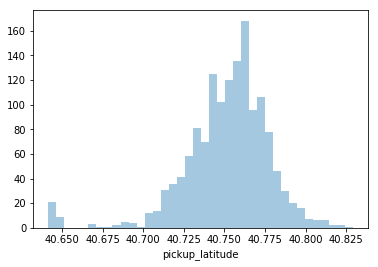

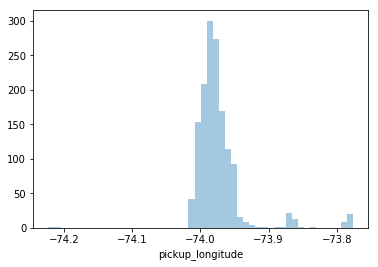

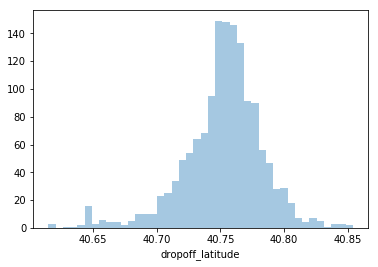

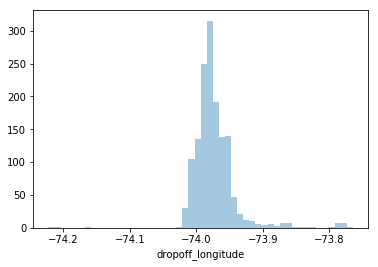

In [92]:
#taxi location latitude, longitude distribution
ax1 = sns.distplot(train["pickup_latitude"], kde=False,);
plt.xlabel('pickup_latitude')
plt.show()

ax2 = sns.distplot(train["pickup_longitude"], kde=False);
plt.xlabel('pickup_longitude')
plt.show()

ax3 = sns.distplot(train["dropoff_latitude"], kde=False);
plt.xlabel('dropoff_latitude')
plt.show()

ax4 = sns.distplot(train["dropoff_longitude"], kde=False);
plt.xlabel('dropoff_longitude')

plt.show()

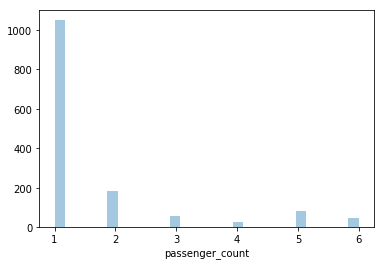

In [36]:
#passenger count
ax1 = sns.distplot(train["passenger_count"], kde=False);
plt.xlabel('passenger_count')
plt.show()

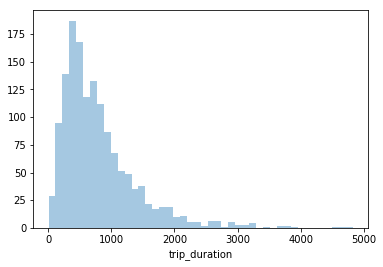

In [35]:
#duration
ax1 = sns.distplot(train["trip_duration"], kde=False);
plt.xlabel('trip_duration')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


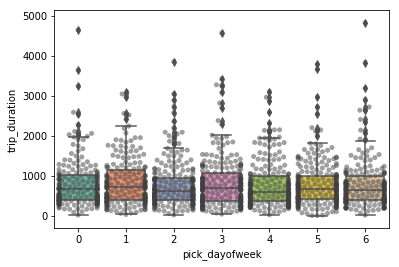

In [81]:
#pick day of week boxplot
ax1 = sns.boxplot(train["pick_dayofweek"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["pick_dayofweek"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


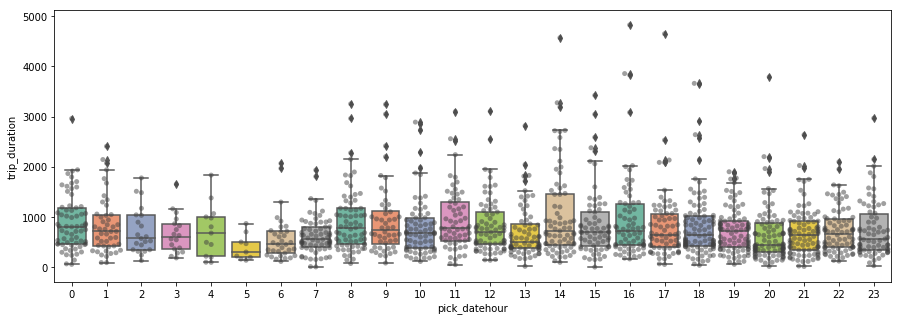

In [80]:
#pick hours boxplot
fig = plt.figure(figsize=(15,5))
ax1 = sns.boxplot(train["pick_datehour"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["pick_datehour"],  train["trip_duration"],  color="0.25", alpha=.5)
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


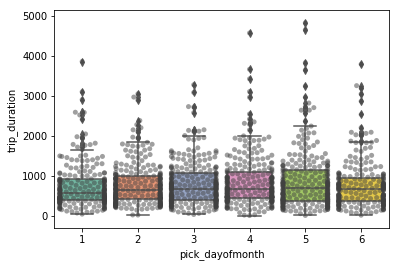

In [78]:
#pick month boxplot
ax1 = sns.boxplot(train["pick_dayofmonth"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["pick_dayofmonth"],  train["trip_duration"],  color="0.25", alpha=.5)
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


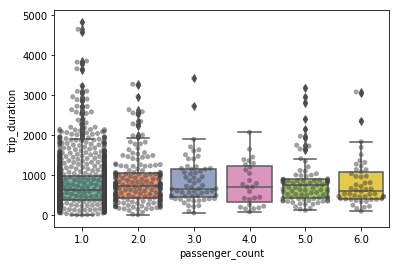

In [77]:
#pick passenger count boxplot
ax1 = sns.boxplot(train["passenger_count"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["passenger_count"],  train["trip_duration"],  color="0.25", alpha=.5)
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


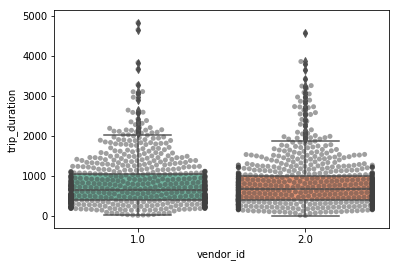

In [75]:
#pick vendor id boxplot
ax1 = sns.boxplot(train["vendor_id"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["vendor_id"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


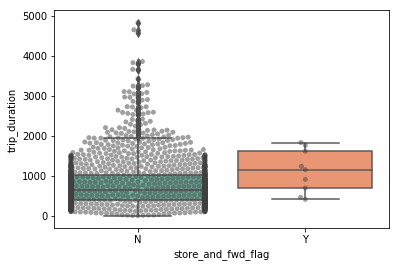

In [74]:
#pick store boxplot
ax1 = sns.boxplot(train["store_and_fwd_flag"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["store_and_fwd_flag"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()

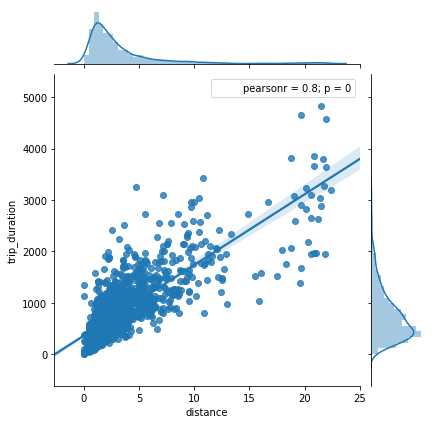

In [82]:
 ## distance와 trip_duration의 jointplot
ax1 = sns.jointplot(train['distance'], train['trip_duration'], kind = 'reg')
plt.show()

# 1.2.d Map Visualization

- locate data onto NYC map (pickup location)

In [28]:
# interactive map visualization
# pick location and count data on the map
#center location
center=[np.mean(train['pickup_latitude']), np.mean(train['pickup_longitude'])]

m = folium.Map(
    location = center,
    zoom_start=9)

marker_cluster = MarkerCluster(
    name='1000 clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)

for i in range(len(train)):
    location1=[train.iloc[i, 6], train.iloc[i, 5]]
    folium.CircleMarker(
        location=location1,
        radius=1,
        color = "blue"
      ).add_to(m)
    marker = folium.Marker(location=location1)
    marker_cluster.add_child(marker)
    marker_cluster.add_to(m)
    
m

# parellel coordinates

In [96]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(train[['vendor_id','day_of_week', 'passenger_count']], 'vendor_id', colormap='rainbow')
plt.show()

KeyError: "['day_of_week'] not in index"

# Interpretation